How runtime has changed over time, and whether this can be correlated to other factors.   


In [1]:
%matplotlib notebook
#import dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read the csv into dataframe
netflix_shows_df = pd.read_csv('Resources/clean_netflix_shows.csv',index_col=0)


In [3]:
#display dataframe
netflix_shows_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Omdb Review Score,Omdb Review Count,Month,Year,Financial Quarter
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2.5,"1,515",August,2019,3
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,3.9,31,August,2020,3
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2.6,"1,201",December,2019,4
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,3.2,"32,162",January,2018,1
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,3.4,"1,048",October,2020,4
...,...,...,...,...,...,...,...,...,...,...,...
497,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,8.4,"4,349",December,2018,4
498,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,8.4,"13,353",October,2015,4
499,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,8.5,"2,001",December,2018,4
500,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,8.6,"1,136",December,2020,4


In [4]:
netflix_shows_df.dtypes

Title                 object
Genre                 object
Premiere              object
Runtime                int64
IMDB Score           float64
Language              object
Omdb Review Score    float64
Omdb Review Count     object
Month                 object
Year                   int64
Financial Quarter      int64
dtype: object

In [5]:
# Figure out the minimum and maximum Runtime
print(netflix_shows_df["Runtime"].max())
print(netflix_shows_df["Runtime"].min())

209
4


In [6]:
yearly_count = netflix_shows_df["Year"].value_counts()
yearly_count

2020    145
2019    109
2018     90
2017     63
2021     56
2016     29
2015      9
2014      1
Name: Year, dtype: int64

In [7]:
grouped_yearlycount = netflix_shows_df.groupby("Year")
print(grouped_yearlycount)
grouped_count = grouped_yearlycount.size()
grouped_count.head()

Year
2014     1
2015     9
2016    29
2017    63
2018    90
dtype: int64

In [8]:
average_yearly_runtime = netflix_shows_df .groupby("Year")["Runtime"].mean()

average_yearly_runtime.head(10)

Year
2014     81.000000
2015     90.444444
2016     92.758621
2017     92.793651
2018     94.844444
2019     88.082569
2020     94.262069
2021    103.267857
Name: Runtime, dtype: float64

In [11]:
#Genre data
Genre_data = netflix_shows_df["Genre"].value_counts()
Genre_data.head()

Documentary        143
Drama               63
Comedy              36
Romantic comedy     35
Thriller            28
Name: Genre, dtype: int64

In [30]:
#groupby on Year
Year_groupby = netflix_shows_df.groupby('Year')
runtime_mean= Year_groupby['Runtime'].mean()

In [31]:
runtime_mean

Year
2014     81.000000
2015     90.444444
2016     92.758621
2017     92.793651
2018     94.844444
2019     88.082569
2020     94.262069
2021    103.267857
Name: Runtime, dtype: float64

In [18]:
#Group by Genre
Genre_groupby = netflix_shows_df.groupby('Genre')
runtime_mean = Genre_groupby['Runtime'].mean()


<IPython.core.display.Javascript object>


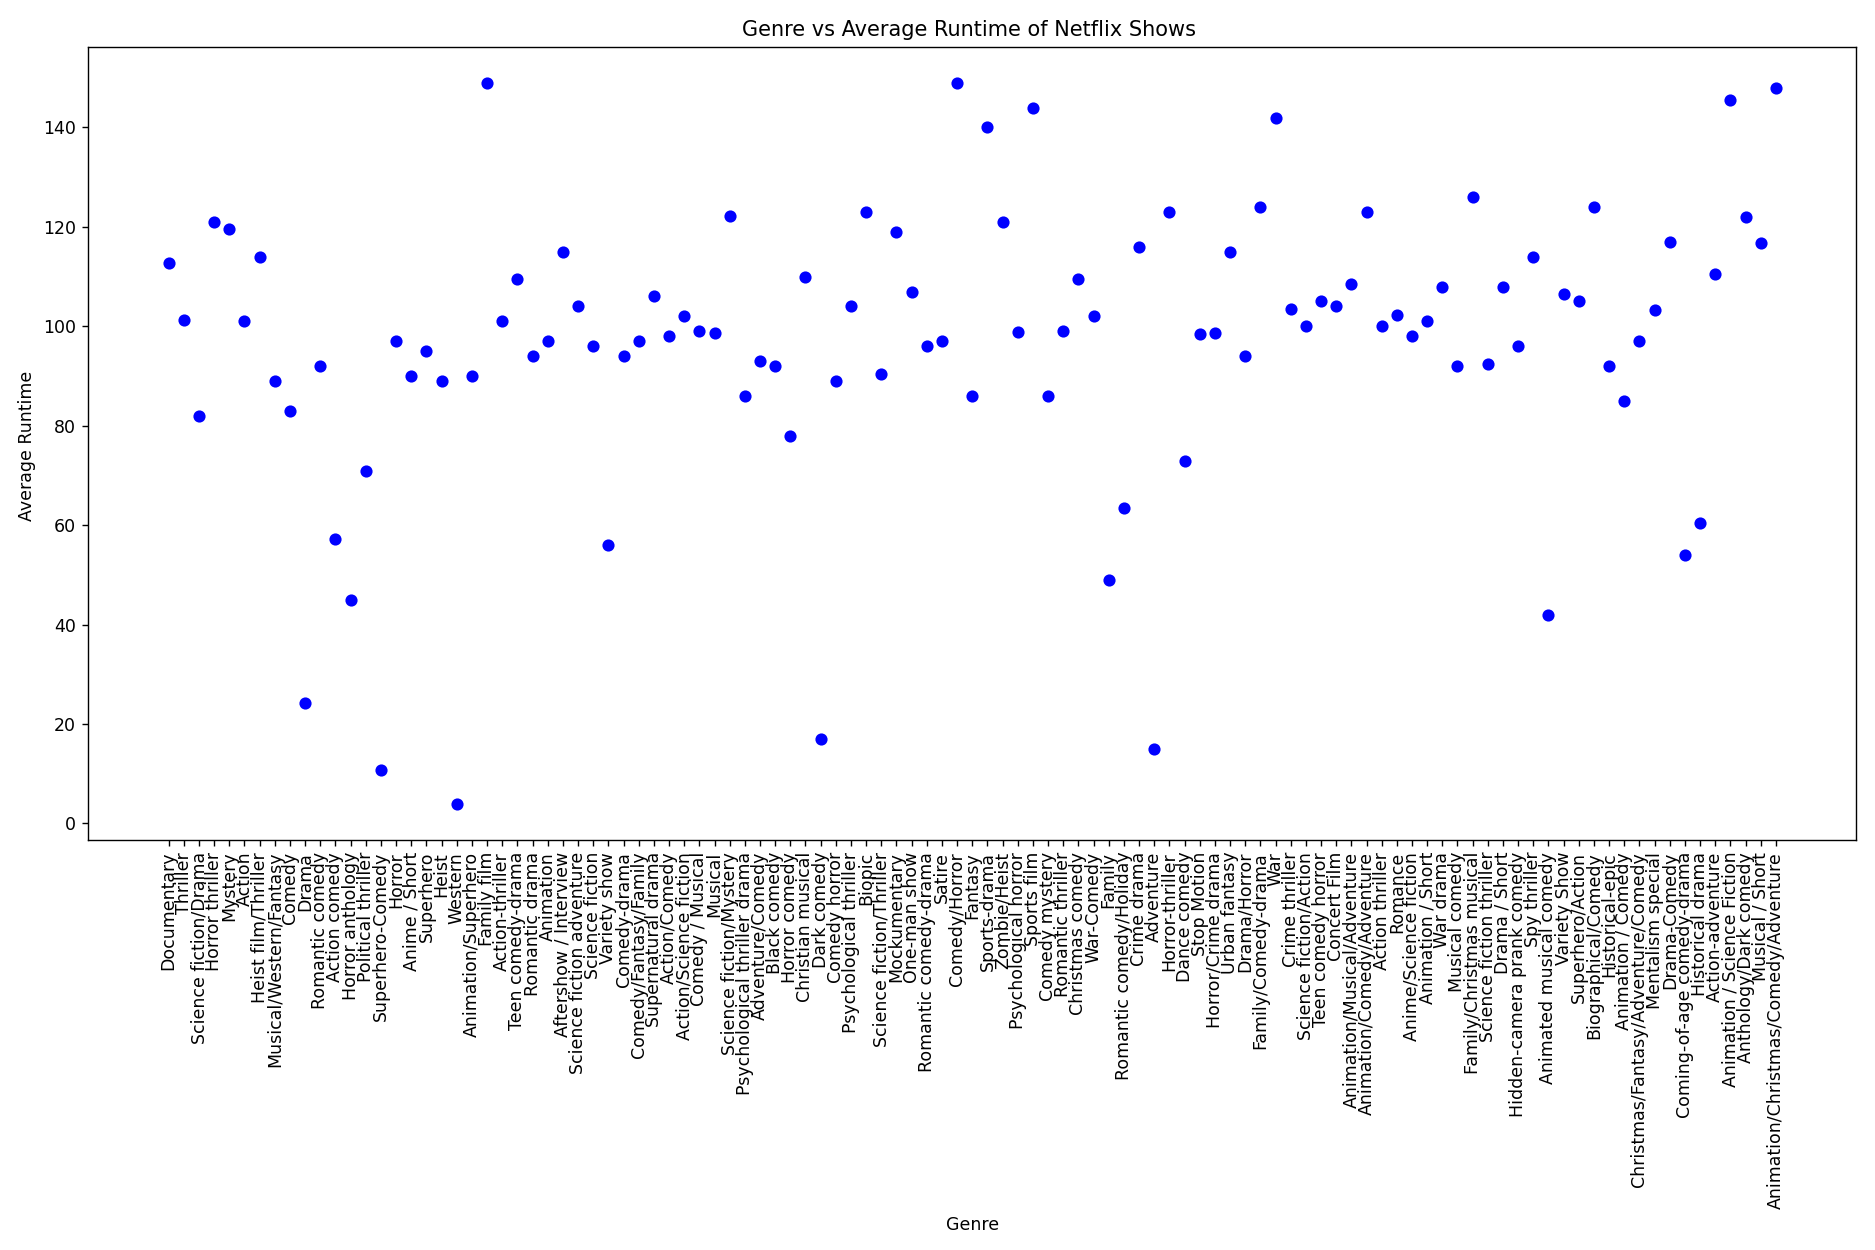

In [19]:
#plotting a scatter plot for the Genre 
x_axis =netflix_shows_df['Genre'].unique()
y_axis = runtime_mean
plt.figure(figsize=(15,10))
plt.scatter(x_axis,y_axis,color = 'Blue')
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average Runtime ")
plt.title("Genre vs Average Runtime of Netflix Shows ")
plt.tight_layout()

<IPython.core.display.Javascript object>


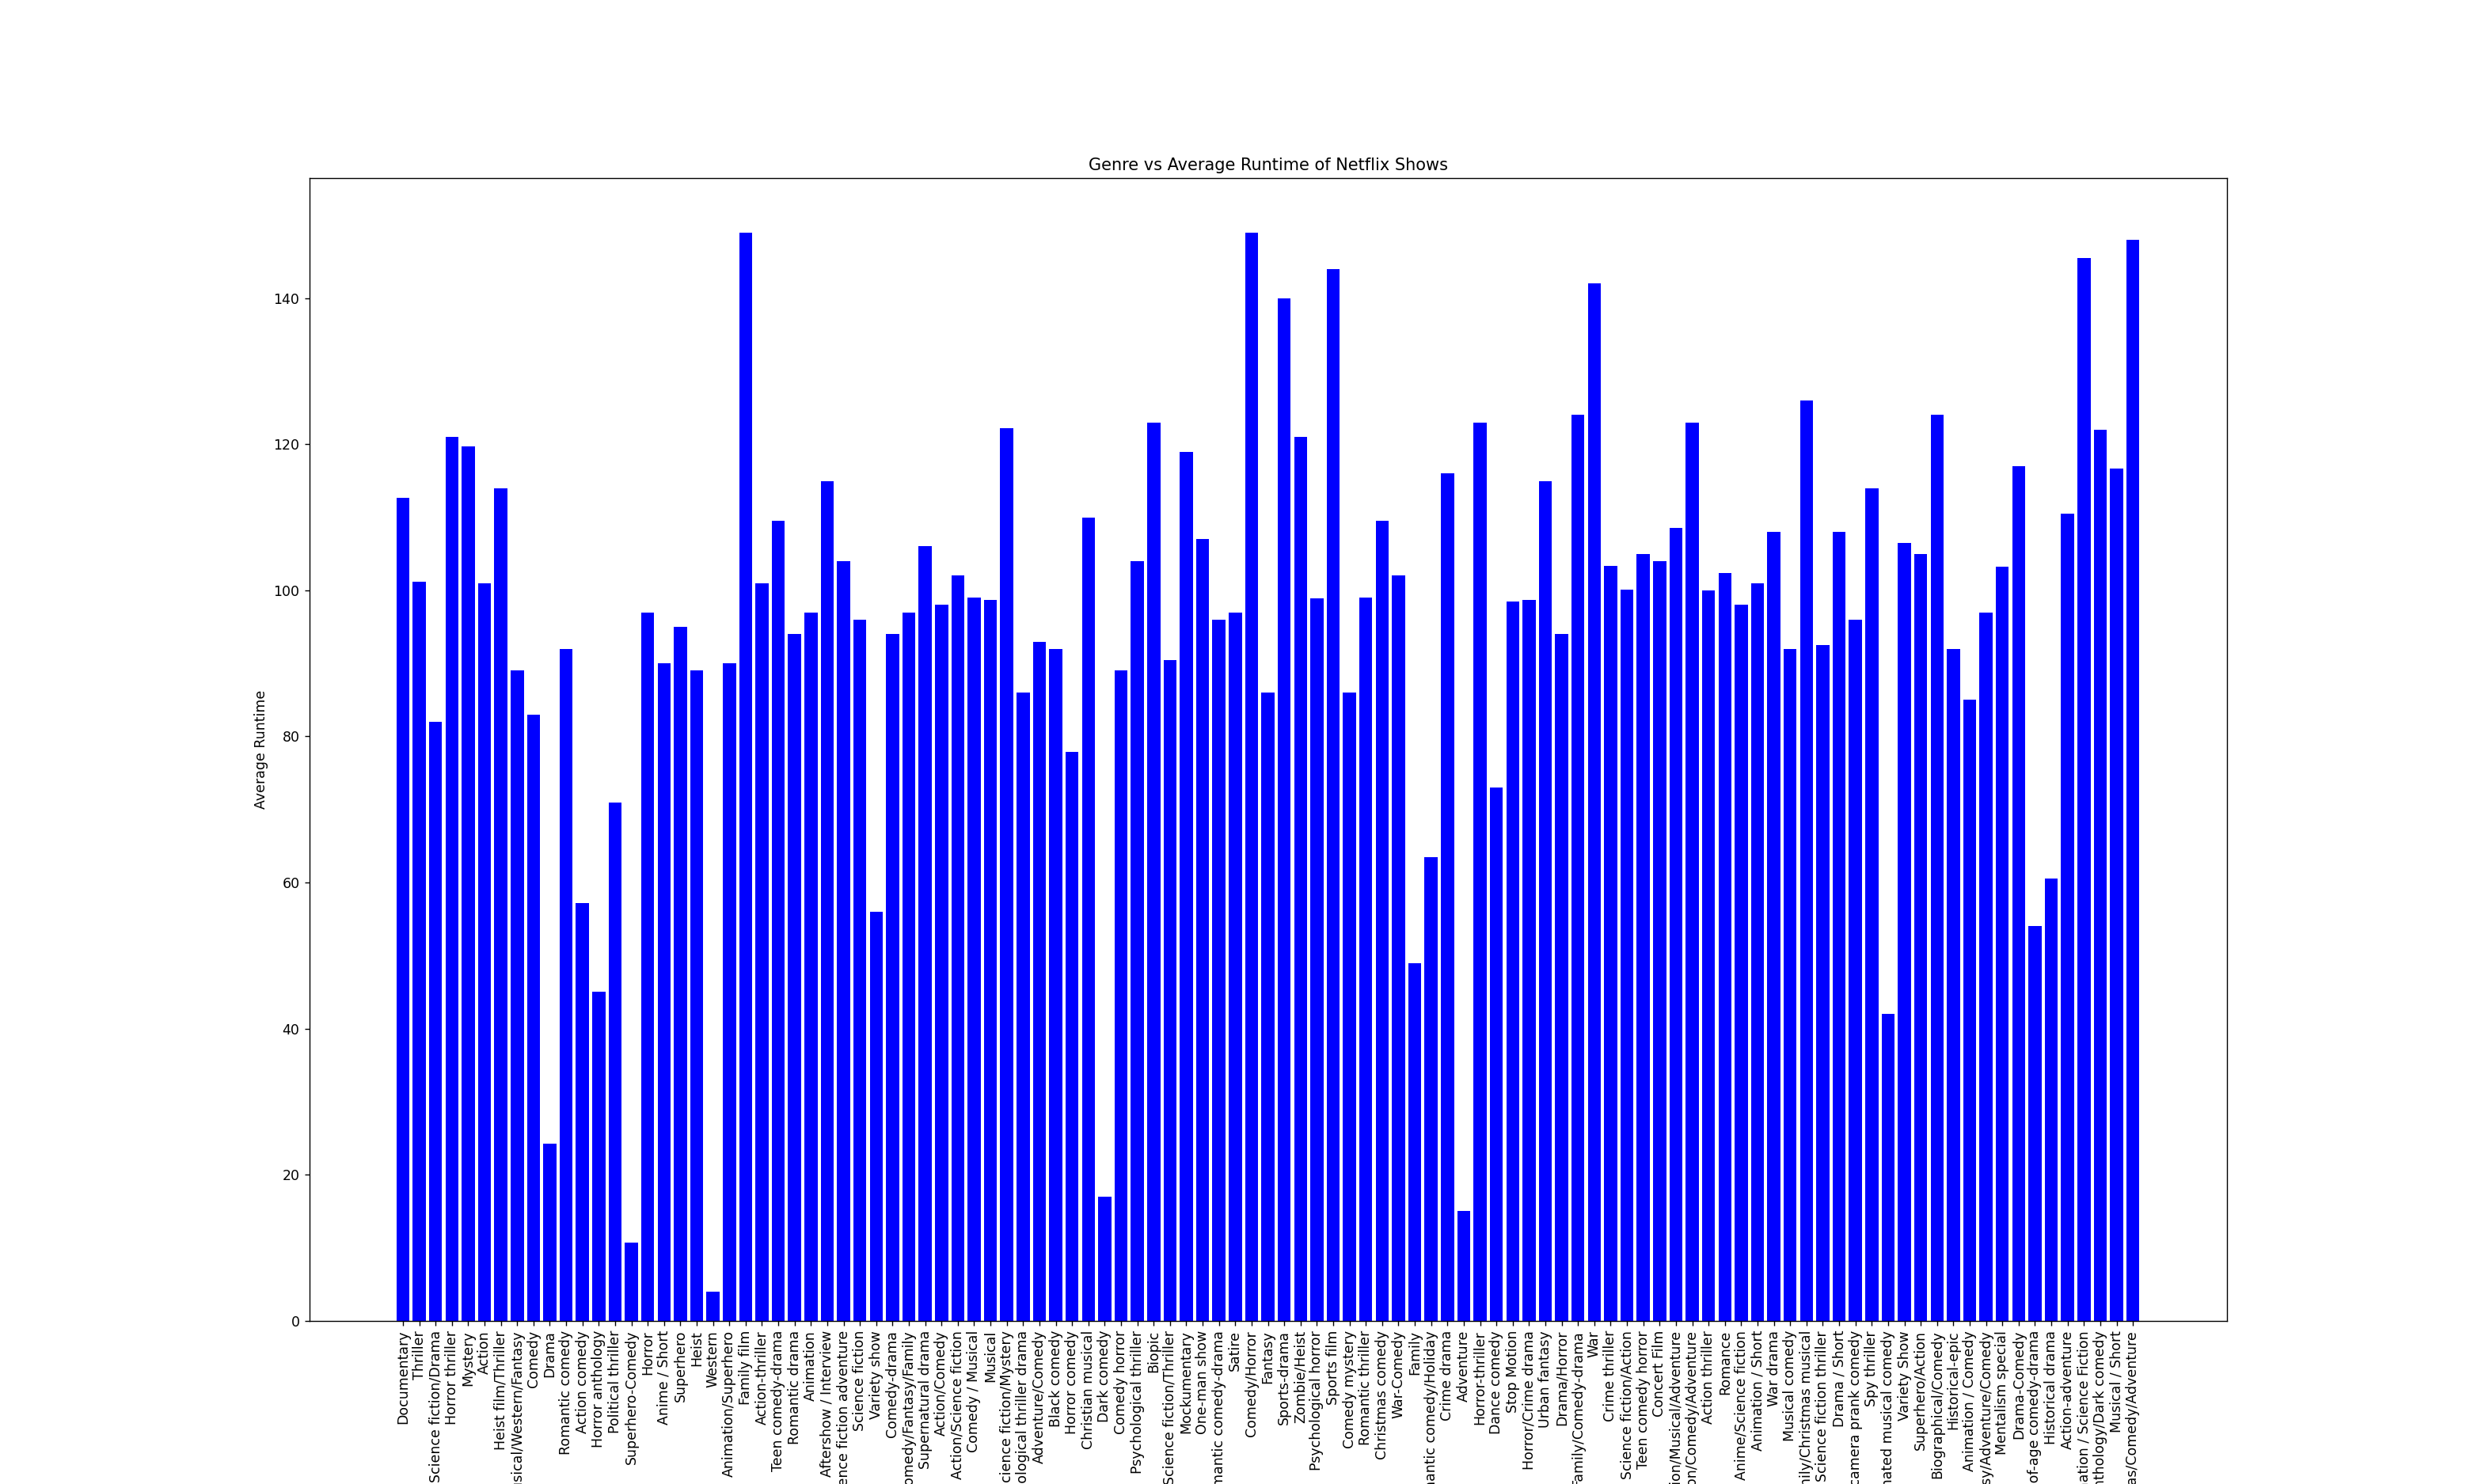

Text(0, 0.5, 'Average Runtime')

In [20]:
#plotting a Bar plot for the Genre 
x_axis =netflix_shows_df['Genre'].unique()
y_axis =runtime_mean
plt.figure(figsize=(25,15))
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation=90)

# Give the chart a title, x label, and y label
plt.title("Genre vs Average Runtime of Netflix Shows")
plt.xlabel("Genre")
plt.ylabel("Average Runtime")




<IPython.core.display.Javascript object>


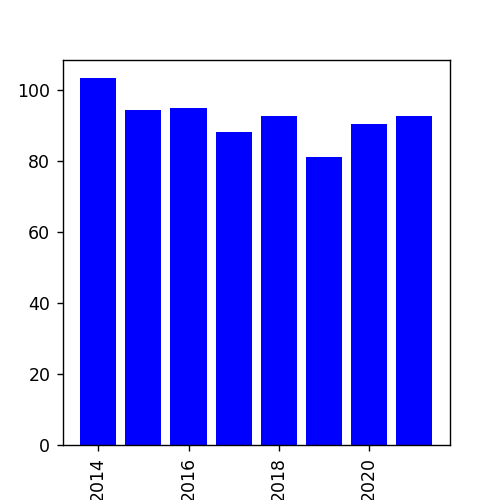

In [40]:
#plotting a Bar plot for the Year 
x_axis =netflix_shows_df["Year"].unique()
y_axis =runtime_mean
plt.figure(figsize=(4,4))
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation=90)
plt.savefig("output/Year_vs_Average Runtime of Netflix Shows.png")

In [21]:
sorted_on_Runtime = runtime_mean.sort_values()
sorted_on_Runtime

Genre
Anime / Short              4.00
Animation / Short         10.75
Musical / Short           15.00
Drama / Short             17.00
Aftershow / Interview     24.25
                          ...  
Horror anthology         144.00
War drama                145.50
Zombie/Heist             148.00
Heist film/Thriller      149.00
Anthology/Dark comedy    149.00
Name: Runtime, Length: 107, dtype: float64

<IPython.core.display.Javascript object>


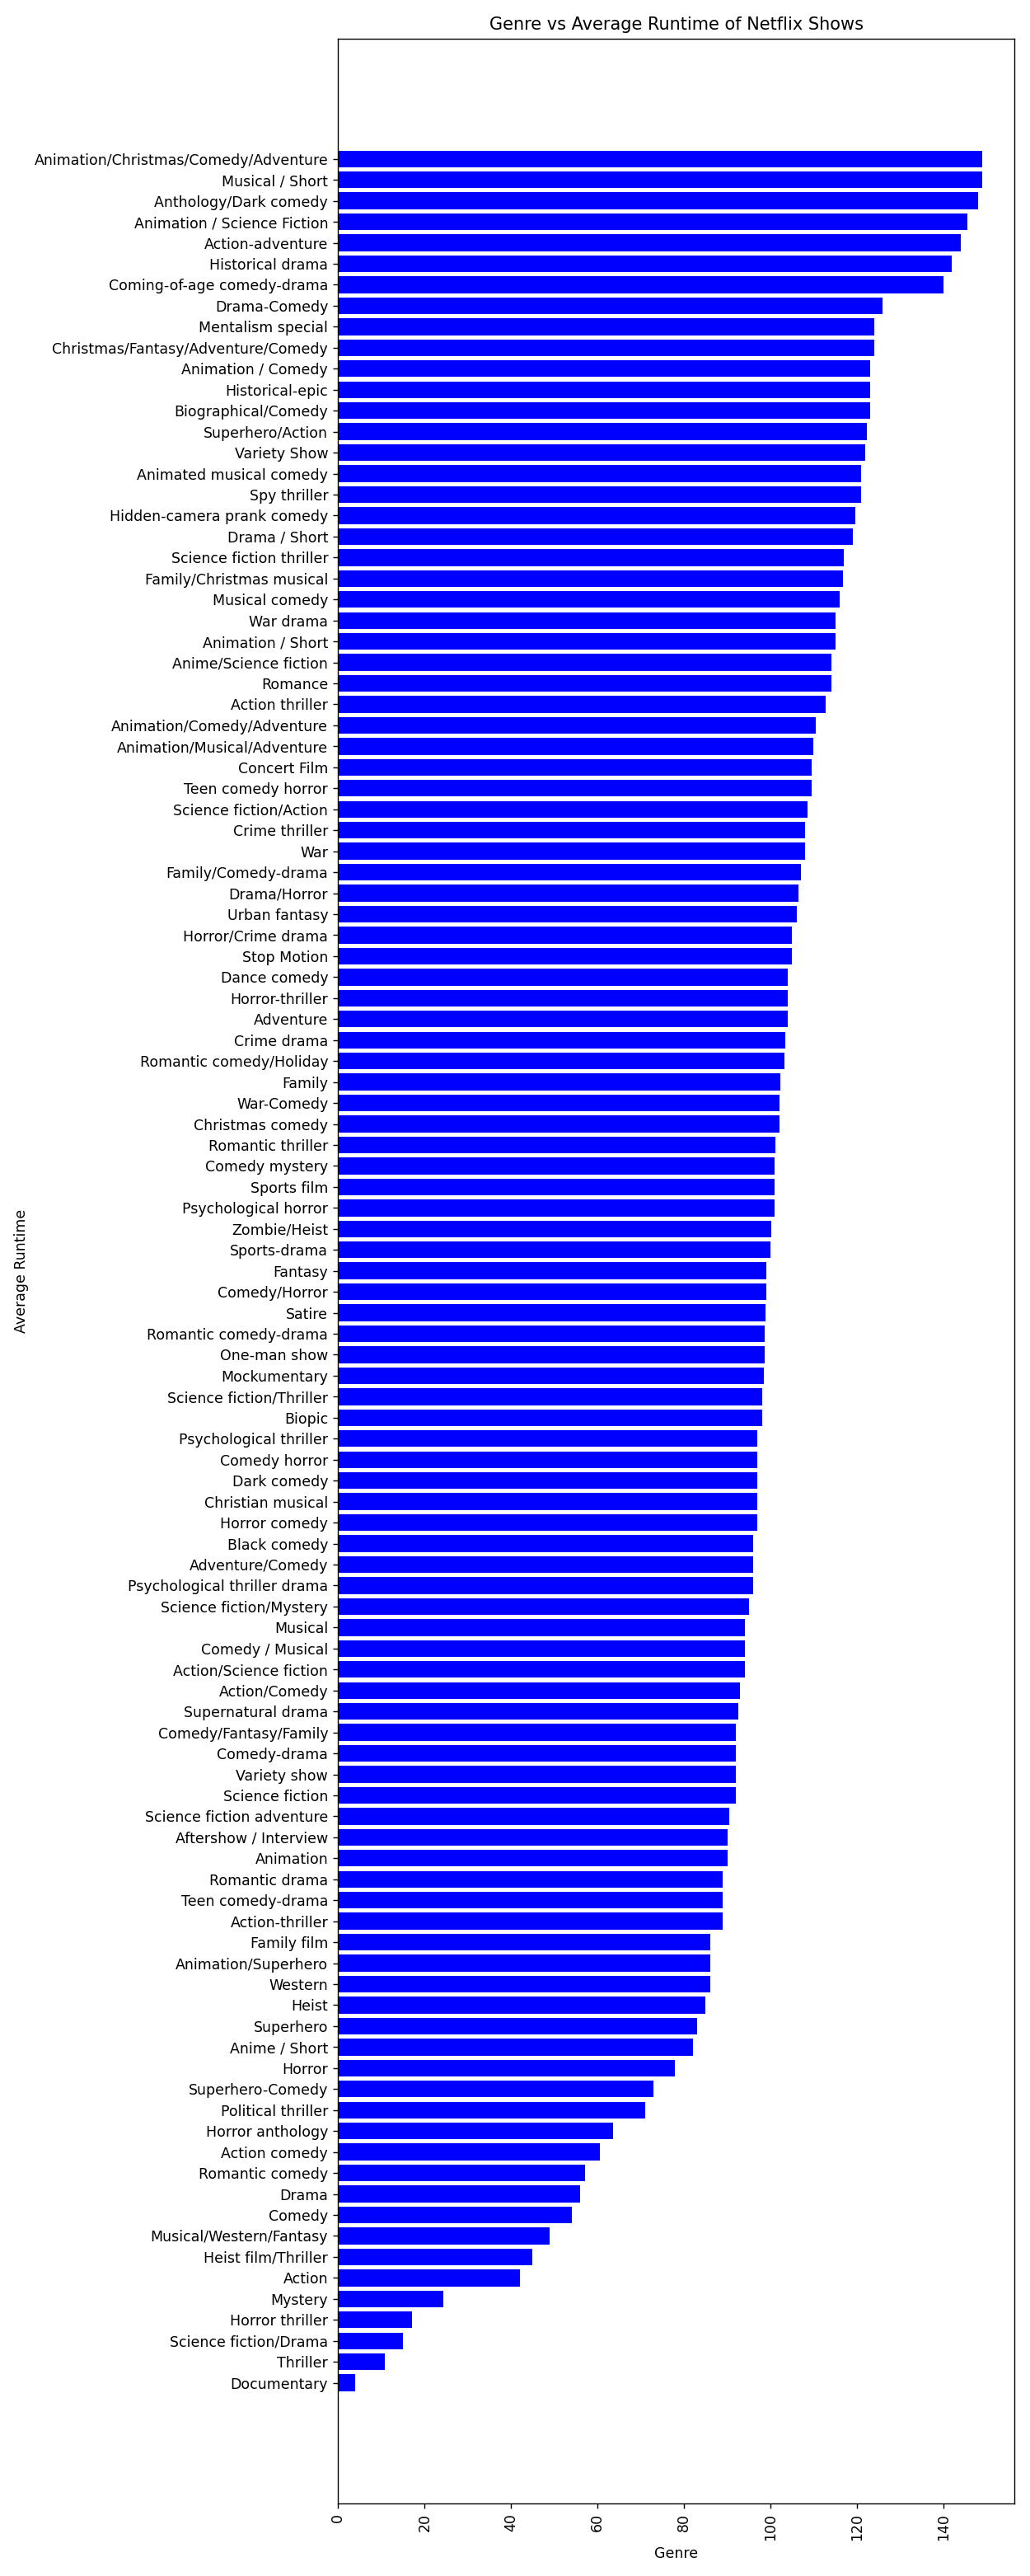

In [41]:
x_axis =netflix_shows_df['Genre'].unique()
y_axis =sorted_on_Runtime 
plt.figure(figsize=(10,25)) 
plt.barh(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation=90)
plt.show(block=True);

# Give the chart a title, x label, and y label
plt.title("Genre vs Average Runtime of Netflix Shows")
plt.xlabel("Genre")
plt.ylabel("Average Runtime")
plt.tight_layout()
plt.savefig("output/Genre_vs_Average Runtime of Netflix Shows.png")

<IPython.core.display.Javascript object>


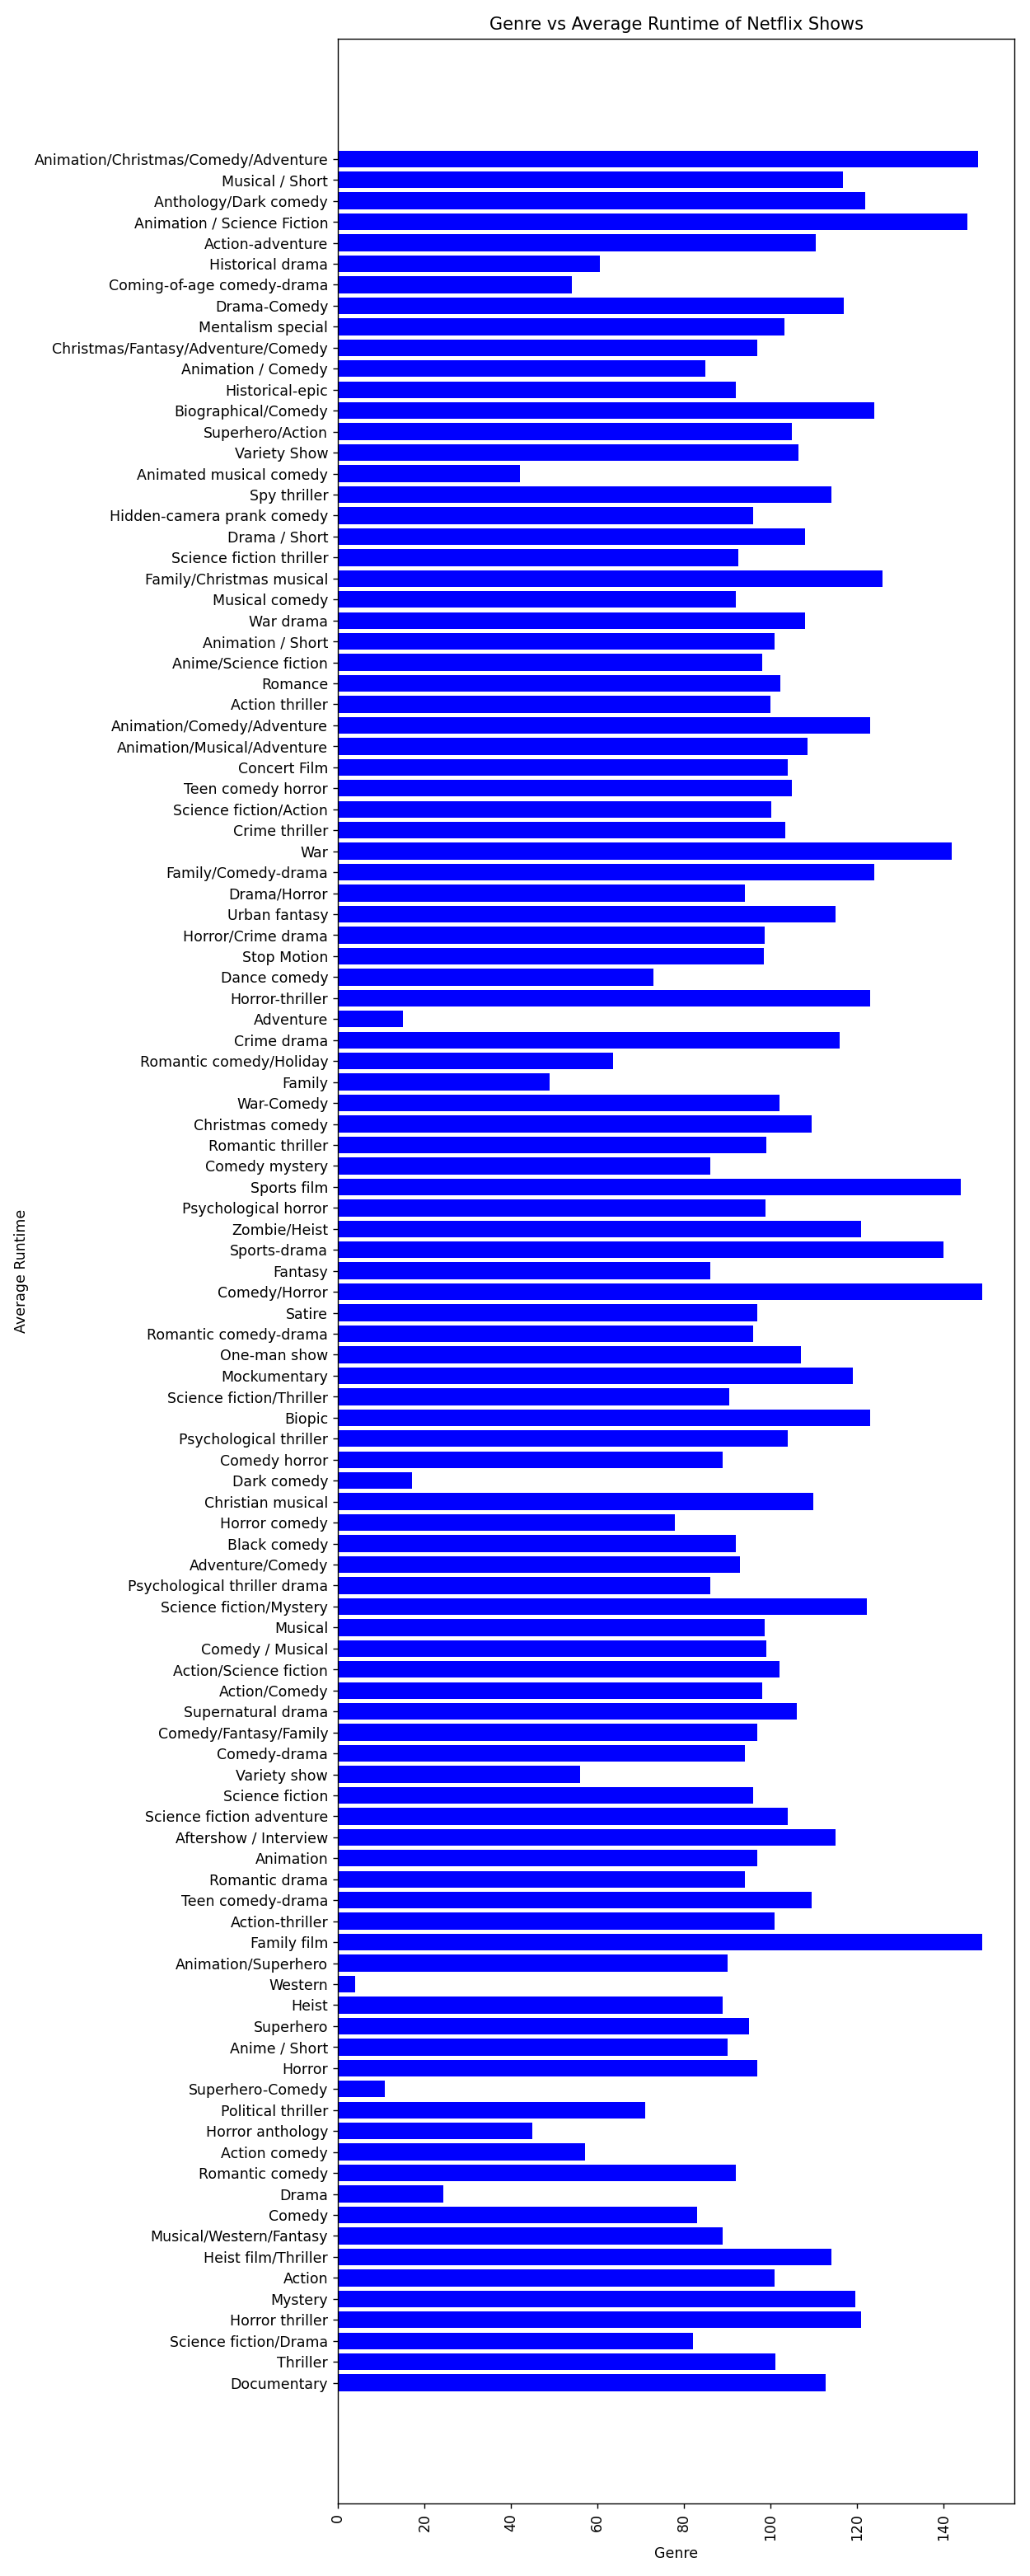

In [23]:
x_axis =netflix_shows_df['Genre'].unique()
y_axis =runtime_mean
plt.figure(figsize=(10,25)) 
plt.barh(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation=90)
plt.show(block=True);

# Give the chart a title, x label, and y label
plt.title("Genre vs Average Runtime of Netflix Shows")
plt.xlabel("Genre")
plt.ylabel("Average Runtime")
plt.tight_layout()

In [24]:
sorted_on_Genre = netflix_shows_df.sort_values(by = ["Genre"])
sorted_on_Genre

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Omdb Review Score,Omdb Review Count,Month,Year,Financial Quarter
234,Polar,Action,"January 25, 2019",118,6.3,English,6.3,"79,753",January,2019,1
315,Extraction,Action,"April 24, 2020",117,6.7,English,6.7,"171,447",April,2020,2
128,Point Blank,Action,"July 12, 2019",86,5.7,English,7.3,"19,135",July,2019,3
34,Sentinelle,Action,"March 5, 2021",80,4.7,French,4.7,"6,717",March,2021,1
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,7.8,"587,337",November,2019,4
...,...,...,...,...,...,...,...,...,...,...,...
190,War Machine,War-Comedy,"May 26, 2017",122,6.0,English,6.0,"43,226",May,2017,2
205,The Killer,Western,"November 10, 2017",99,6.1,Portuguese,4.7,"1,078",November,2017,4
439,The Ballad of Buster Scruggs,Western,"November 16, 2018",132,7.3,English,7.3,"130,192",November,2018,4
42,The Ridiculous 6,Western,"December 11, 2015",119,4.8,English,4.8,"45,838",December,2015,4


In [25]:
sorted_on_Runtime = runtime_mean.sort_values()
sorted_on_Runtime

Genre
Anime / Short              4.00
Animation / Short         10.75
Musical / Short           15.00
Drama / Short             17.00
Aftershow / Interview     24.25
                          ...  
Horror anthology         144.00
War drama                145.50
Zombie/Heist             148.00
Heist film/Thriller      149.00
Anthology/Dark comedy    149.00
Name: Runtime, Length: 107, dtype: float64